<a href="https://colab.research.google.com/github/dufourpascal/stepupai/blob/master/tutorials/data_augmentation/exploring_data_augmentation_keras_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Augmentation with Keras and Tensorflow
In this tutorial, we are going to explore data augmentation with Keras. Follow allong on [stepup.ai/exploring-data-augmentation-keras](https://stepup.ai/exploring-data-augmentation-keras).

Let's start off by importing what we need from tensorflow and keras, and defining a few helper functions.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests

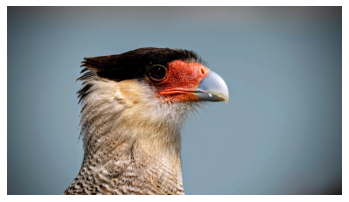

In [2]:
# Get our sample image and write it to disk
url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)

# Transform the image into a tensor and display it
image = load_img('image.jpg')
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

In [3]:
def default_datagen():
  '''Returns a default ImageDataGenerator without any transformation enabled.'''
  datagen = ImageDataGenerator( fill_mode='constant', dtype=int)
  datagen.fit(data)
  return datagen

Let's create a simple helper function for plotting.
This function takes an `ImageDataGenerator` object and sample data, and will plot the result of the data augmentation.

In [4]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  '''
  Apply data augmentation and plot the results
  Accepts an ImageDataGenerator object and example data.
  Specify how many rows and columns to show using n_rows and n_cols (default 1, 5)
  '''
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  plt.figure(figsize=(n_cols*4, n_rows*3))
  for image_index in range(n_images):
    image = next(gen_flow)
    # print(image.min(), image.max(), image.dtype)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)

# Visualizing Transformations
Now let's visualize the different transformations available in Keras.
In each step, we will initialize a default `ImageDataGenerator` object, then set the augmentation parameters we are interested in, and finally visualize the result.

## 1. Image Shift

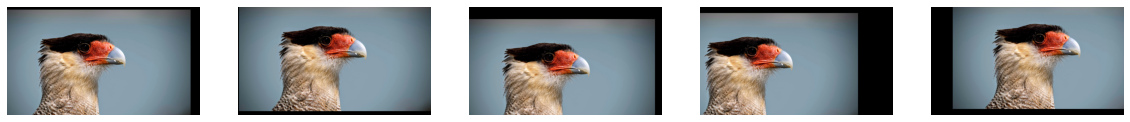

In [5]:
datagen = default_datagen()
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2
plot_augmentation(datagen, data)

## 2. Flips

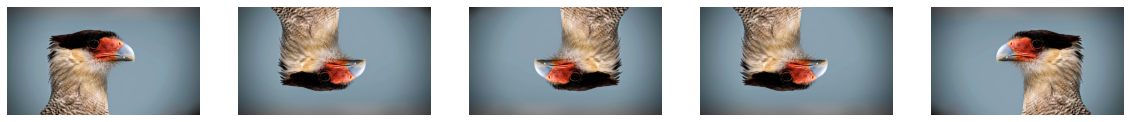

In [ ]:
datagen = default_datagen()
datagen.horizontal_flip = True
datagen.vertical_flip = True
plot_augmentation(datagen, data)

## 3. Rotation

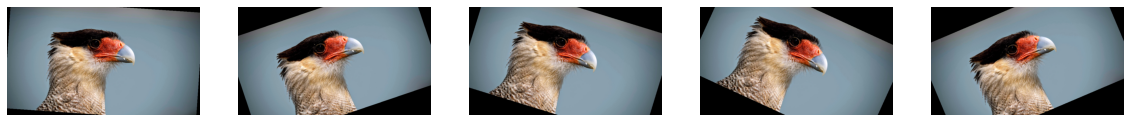

In [ ]:
datagen = default_datagen()
datagen.rotation_range = 25
plot_augmentation(datagen, data)

## 4. Zoom

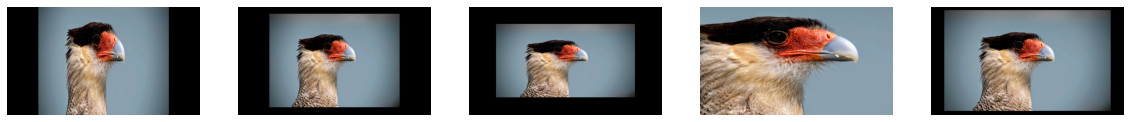

In [7]:
datagen = default_datagen()
datagen.zoom_range = [0.5, 1.5]
plot_augmentation(datagen, data)

## 5. Shear

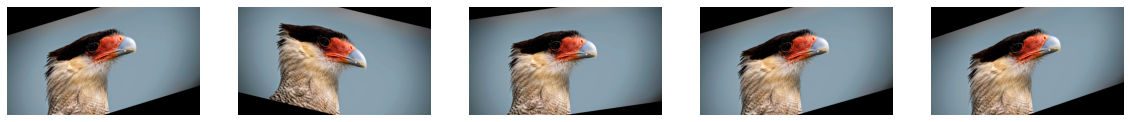

In [ ]:
datagen = default_datagen()
datagen.shear_range = 20
plot_augmentation(datagen, data)

## 6. Brightness

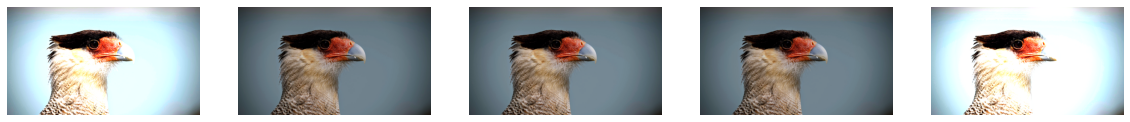

In [15]:
datagen = default_datagen()
datagen.brightness_range = [0.5, 2.0]
plot_augmentation(datagen, data)

# Combining Multiple Transformations for Data Augmentation

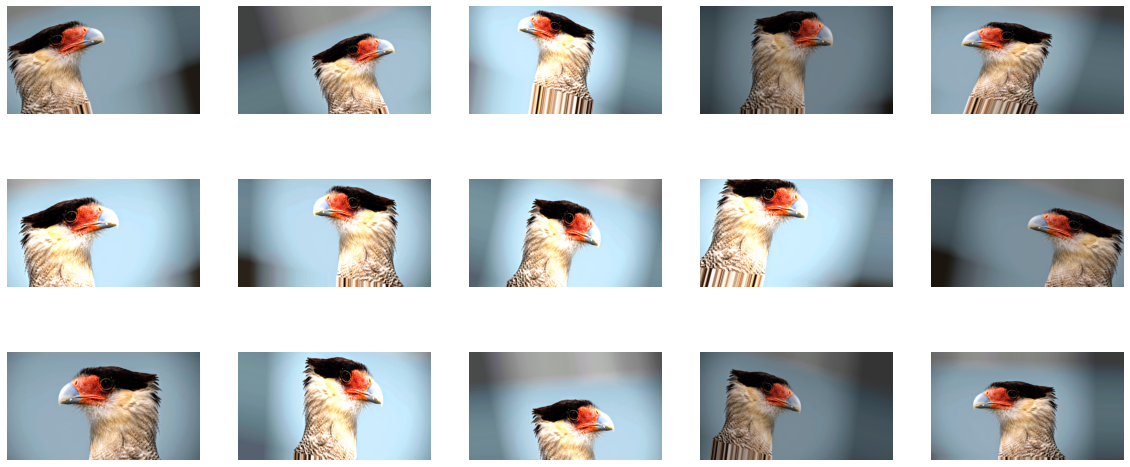

In [ ]:
datagen = default_datagen()
datagen.fill_mode='nearest'
datagen.horizontal_flip=True
datagen.width_shift_range=0.2
datagen.height_shift_range=0.2
datagen.zoom_range=[0.8, 1.2]
datagen.rotation_range=20
datagen.shear_range=10
datagen.brightness_range = [0.75, 1.5]
plot_augmentation(datagen, data, n_rows=3, n_cols=5)